In [171]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)

# Context

In [172]:
pd.options.display.max_columns = None
df = pd.read_csv('train.csv', index_col = 'PassengerId')#т.к. ID пассажира не является значимой величиной, делаем её индексом
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


# Data quality assessment

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [174]:
# проверим пропущенные значения
df.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

In [175]:
df.describe(include = 'all')
# бОльшая часть пассажиров села на корабль в S
# количество мужчин и женщин практически одинаково
# выжило менее 43%
# есть пропущенные данные по признакам числовым признакам возраст (3292),  стоимость (134), 
# и категориальным билет (4 623), каюта (67 866), город (250)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,100000.000000,100000.000000,100000,100000,96708.000000,100000.000000,100000.000000,95377,99866.00000,32134,99750
unique,NaN,NaN,92144,2,NaN,NaN,NaN,75331,NaN,26992,3
top,NaN,NaN,"Johnson, John",male,NaN,NaN,NaN,A/5,NaN,C19828,S
freq,NaN,NaN,31,56114,NaN,NaN,NaN,602,NaN,6,72139
mean,0.427740,2.106910,NaN,NaN,38.355472,0.397690,0.454560,NaN,43.92933,NaN,NaN
std,0.494753,0.837727,NaN,NaN,18.313556,0.862566,0.950076,NaN,69.58882,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.080000,0.000000,0.000000,NaN,0.68000,NaN,NaN
25%,0.000000,1.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,10.04000,NaN,NaN
50%,0.000000,2.000000,NaN,NaN,39.000000,0.000000,0.000000,NaN,24.46000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,53.000000,1.000000,1.000000,NaN,33.50000,NaN,NaN


Построим матрицу корреляции

<AxesSubplot:>

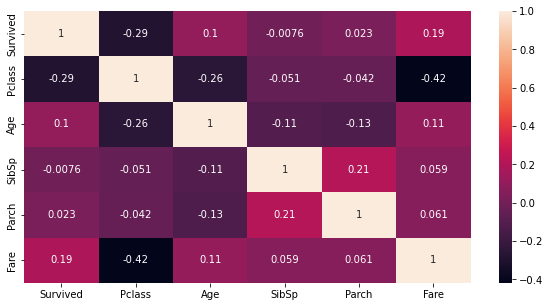

In [176]:
sns.heatmap(df.corr(), annot = True)

### РАССМОТРИМ ЧИСЛОВЫЕ ПРИЗНАКИ

In [177]:
# 1. проверим статистику по полю Age (сгруппируем по наличию/отсутствию значения)
df.groupby(df['Age'].isnull()).describe()

# средние показатели для пассажиров с отсутствущим возрастом практически идентичны остальным пассажирам. можно сделать вывод, 
# что появление таких записей носит случайный характер и не влияет на общую картину
# однако, т.к. мы не хотим терять данные попробуем их заполнить

Survived                                                Pclass  \
         count      mean       std  min  25%  50%  75%  max    count   
Age                                                                    
False  96708.0  0.428279  0.494832  0.0  0.0  0.0  1.0  1.0  96708.0   
True    3292.0  0.411908  0.492253  0.0  0.0  0.0  1.0  1.0   3292.0   

                                                        Age             \
           mean       std  min  25%  50%  75%  max    count       mean   
Age                                                                      
False  2.106206  0.837841  1.0  1.0  2.0  3.0  3.0  96708.0  38.355472   
True   2.127582  0.834244  1.0  1.0  2.0  3.0  3.0      0.0        NaN   

                                                  SibSp                      \
             std   min   25%   50%   75%   max    count      mean       std   
Age                                                                           
False  18.313556  0.08  25.0  39.0  53.0  87.0  96708.0  0.398240  0.863834   
True         NaN   NaN   NaN   NaN   NaN   NaN   3292.0  0.381531  0.824422   

                                  Parch                                     \
       min  25%  50%  75%  max    count      mean       std  min  25%  50%   
Age                                                                          
False  0.0  0.0  0.0  1.0  8.0  96708.0  0.455278  0.951705  0.0  0.0  0.0   
True   0.0  0.0  0.0  1.0  8.0   3292.0  0.433475  0.900797  0.0  0.0  0.0   

                    Fare                                                   \
       75%  max    count       mean        std   min    25%    50%    75%   
Age                                                                         
False  1.0  9.0  96579.0  43.940262  69.541663  0.68  10.04  24.48  33.53   
True   1.0  9.0   3287.0  43.608126  70.970441  2.79  10.00  23.89  32.67   

               
          max  
Age            
False  744.66  
True   732.01

In [178]:
# 2. проверим статистику по полю Fare (сгруппируем по наличию/отсутствию значения)
df.groupby(df['Fare'].isnull()).describe()

# любопытно, что процент выживших среди тех, у кого стоимость билета не указана, несколько выше

Survived                                                Pclass  \
         count      mean       std  min  25%  50%  75%  max    count   
Fare                                                                   
False  99866.0  0.427703  0.494748  0.0  0.0  0.0  1.0  1.0  99866.0   
True     134.0  0.455224  0.499860  0.0  0.0  0.0  1.0  1.0    134.0   

                                                        Age             \
           mean       std  min  25%  50%  75%  max    count       mean   
Fare                                                                     
False  2.106933  0.837746  1.0  1.0  2.0  3.0  3.0  96579.0  38.355244   
True   2.089552  0.826831  1.0  1.0  2.0  3.0  3.0    129.0  38.526512   

                                                  SibSp                      \
             std   min   25%   50%   75%   max    count      mean       std   
Fare                                                                          
False  18.313897  0.08  25.0  39.0  53.0  87.0  99866.0  0.397803  0.862821   
True   18.125790  0.92  25.0  38.0  54.0  73.0    134.0  0.313433  0.642105   

                                   Parch                                     \
       min  25%  50%   75%  max    count      mean       std  min  25%  50%   
Fare                                                                          
False  0.0  0.0  0.0  1.00  8.0  99866.0  0.454529  0.950263  0.0  0.0  0.0   
True   0.0  0.0  0.0  0.75  4.0    134.0  0.477612  0.801469  0.0  0.0  0.0   

                    Fare                                                        
       75%  max    count      mean       std   min    25%    50%   75%     max  
Fare                                                                            
False  1.0  9.0  99866.0  43.92933  69.58882  0.68  10.04  24.46  33.5  744.66  
True   1.0  3.0      0.0       NaN       NaN   NaN    NaN    NaN   NaN     NaN

In [179]:
#посмотрим распределение описательной статистики по классам билета
df.groupby(df['Pclass']).describe()

#выживаемость заметно падает с понижением класса
#т.к. целевой переменной является выживаемость, то логично заполнить пропуски по возрасту и цене билета в соответствии с
#классом билета для данного пассажира

Survived                                                   Age  \
          count      mean       std  min  25%  50%  75%  max    count   
Pclass                                                                  
1       30315.0  0.579779  0.493602  0.0  0.0  1.0  1.0  1.0  29353.0   
2       28679.0  0.525018  0.499382  0.0  0.0  1.0  1.0  1.0  27731.0   
3       41006.0  0.247305  0.431451  0.0  0.0  0.0  0.0  1.0  39624.0   

                                                              SibSp            \
             mean        std   min   25%   50%   75%   max    count      mean   
Pclass                                                                          
1       44.774464  14.706884  0.08  35.0  47.0  56.0  83.0  30315.0  0.466337   
2       38.631237  19.269780  0.08  24.0  38.0  55.0  87.0  28679.0  0.382161   
3       33.407362  18.531413  0.08  22.0  30.0  49.0  85.0  41006.0  0.357801   

                                             Parch                           \
             std  min  25%  50%  75%  max    count      mean       std  min   
Pclass                                                                        
1       0.778886  0.0  0.0  0.0  1.0  8.0  30315.0  0.517170  1.001381  0.0   
2       0.930673  0.0  0.0  0.0  0.0  8.0  28679.0  0.438335  0.904512  0.0   
3       0.868873  0.0  0.0  0.0  0.0  8.0  41006.0  0.419622  0.939929  0.0   

                               Fare                                            \
        25%  50%  75%  max    count       mean        std   min    25%    50%   
Pclass                                                                          
1       0.0  0.0  1.0  9.0  30275.0  92.653113  99.821850  3.38  27.89  63.58   
2       0.0  0.0  1.0  9.0  28637.0  25.756003  34.849110  1.72  10.17  22.72   
3       0.0  0.0  0.0  9.0  40954.0  20.618226  32.621763  0.68   8.54  10.96   

                         
            75%     max  
Pclass                   
1       116.875  744.66  
2        29.210  613.43  
3        25.770  640.79

#### заменим пропущенные значения для Age и Fare медианами в соответствии с классом билета

In [180]:
# заменяем медианой NaN
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace = True)
#аналогичным образом поступаем для стоимости билетов
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace = True)

array([[<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Family'}>]], dtype=object)

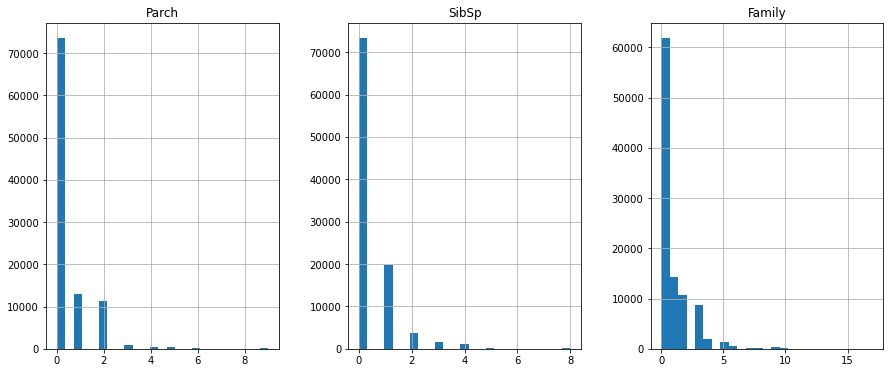

In [181]:
# 3. посмотрим на взаимоотношение SibSp и Parch с учетом выживаемости
# количество детей/родителе и количество братьев/сестер/супругов относится к одной и той же категории иноформации - семья
# логично будет объединить для каждого пассажира всех его близких родственников в одну колонку
df['Family'] = df['Parch'] + df['SibSp']
family = ['Parch','SibSp', 'Family']
df[family].hist(bins=25, figsize=(15, 6), layout=(1, 3))

### РАССМОТРИМ КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ

In [182]:
# 1. место посадки
df['Embarked'].value_counts(dropna=False, normalize=True)

# как видим более 72% пассажиров поднялись на борт в Southampton, а количество NaN составляет 0,25%, поэтому можно пропущенные 
# значения заменить на 'S'

S      0.72139
C      0.22187
Q      0.05424
NaN    0.00250
Name: Embarked, dtype: float64

In [183]:
df['Embarked'].fillna('S', inplace = True)

In [184]:
# 2. каюта
df.groupby(df['Cabin'].isnull()).describe(include = 'all')
# у 67.9% пассажиров не указан номер каюты, 
# при этом выживших пасажиров гораздо больше среди тех, у кого номер каюты указан (около 60%)
# в то время как выживших среди пассажиров без каюты около 34% т.е. практически в два раза меньше
# большинство пассажиров без каюты были с билетами второго и третьего классов
# из 32134 заполненных значений 26992 уникальны

Survived                                                               \
         count unique top freq      mean       std  min  25%  50%  75%  max   
Cabin                                                                         
False  32134.0    NaN NaN  NaN  0.608608  0.488069  0.0  0.0  1.0  1.0  1.0   
True   67866.0    NaN NaN  NaN  0.342101  0.474417  0.0  0.0  0.0  1.0  1.0   

        Pclass                                                               \
         count unique top freq      mean       std  min  25%  50%  75%  max   
Cabin                                                                         
False  32134.0    NaN NaN  NaN  1.243418  0.563961  1.0  1.0  1.0  1.0  3.0   
True   67866.0    NaN NaN  NaN  2.515766  0.602723  1.0  2.0  3.0  3.0  3.0   

        Name                                                                \
       count unique            top freq mean  std  min  25%  50%  75%  max   
Cabin                                                                        
False  32134  31138    Smith, Mary    8  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
True   67866  63456  Johnson, John   27  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

         Sex                                                           \
       count unique     top   freq mean  std  min  25%  50%  75%  max   
Cabin                                                                   
False  32134      2  female  18156  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
True   67866      2    male  42136  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

           Age                                                                \
         count unique top freq       mean        std   min   25%   50%   75%   
Cabin                                                                          
False  32134.0    NaN NaN  NaN  44.581780  14.993521  0.08  35.0  47.0  55.0   
True   67866.0    NaN NaN  NaN  35.354788  18.617274  0.08  23.0  33.0  51.0   

               SibSp                                                          \
        max    count unique top freq      mean       std  min  25%  50%  75%   
Cabin                                                                          
False  85.0  32134.0    NaN NaN  NaN  0.481608  0.805070  0.0  0.0  0.0  1.0   
True   87.0  67866.0    NaN NaN  NaN  0.357955  0.885729  0.0  0.0  0.0  0.0   

              Parch                                                          \
       max    count unique top freq      mean       std  min  25%  50%  75%   
Cabin                                                                         
False  8.0  32134.0    NaN NaN  NaN  0.559625  1.043289  0.0  0.0  0.0  1.0   
True   8.0  67866.0    NaN NaN  NaN  0.404812  0.898320  0.0  0.0  0.0  0.0   

           Ticket                                                       \
       max  count unique   top freq mean  std  min  25%  50%  75%  max   
Cabin                                                                    
False  9.0  32051  28905   PC     7  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
True   9.0  63326  52335  A/5   600  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

          Fare                                                            \
         count unique top freq       mean        std   min    25%    50%   
Cabin                                                                      
False  32134.0    NaN NaN  NaN  90.847736  98.552784  3.52  27.90  61.96   
True   67866.0    NaN NaN  NaN  21.687041  31.488174  0.68   8.97  12.06   

                        Cabin                                               \
           75%     max  count unique     top freq mean  std  min  25%  50%   
Cabin                                                                        
False  112.745  744.66  32134  26992  C19828    6  NaN  NaN  NaN  NaN  NaN   
True    27.310  688.30      0      0     NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                Embarked                                                       \
       75%  max    count unique top

In [185]:
# создадим дополнительный столбец, указывающий палубу расположения каюты, заменив предварительно NaN на 0 - признак отсутствия каюты
df.loc[df['Cabin'].isnull(),'Cabin'] ='0' 
levels = []
for level in df['Cabin']:
    levels.append(level[0])
df['Desk'] = levels
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Desk
PassengerId,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,47.00,2,0,209245,27.14,C12239,S,2,C
1,0,3,"Bryan, Drew",male,30.00,0,0,27323,13.35,0,S,0,0
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,0,S,3,0
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,0,S,0,0
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,0,S,0,0
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,0,S,0,0
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,0,S,0,0
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,0,S,3,0
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S,3,A


In [186]:
# 3. билет 
df.Ticket.nunique(dropna = True) 
# как видим столбец содержит 75331 уникальных значений

75331

In [187]:
# 4. имя 
df.Name.nunique(dropna = True) 
# в данном столбце 92144 уникальных значения

92144

In [188]:
#посмотрим на срезы данных
df.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Desk
PassengerId,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,47.00,2,0,209245,27.14,C12239,S,2,C
1,0,3,"Bryan, Drew",male,30.00,0,0,27323,13.35,0,S,0,0
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,0,S,3,0
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,0,S,0,0
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,0,S,0,0
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,0,S,0,0
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,0,S,0,0
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,0,S,3,0
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S,3,A


In [189]:
df.tail(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Desk
PassengerId,,,,,,,,,,,,,
99980,0,1,"Pamperin, Kathleen",female,54.0,2,0,7440,10.19,0,S,2,0
99981,1,2,"Bays, Mary",female,18.0,0,0,45065,15.81,0,C,0,0
99982,0,2,"Kozan, Frank",male,28.0,0,0,C.A.,18.01,0,S,0,0
99983,1,2,"Longtin, Julian",male,58.0,0,0,W./C. 480683,13.64,0,S,0,0
99984,1,3,"Toth, Petra",female,26.0,0,0,425962,8.30,0,S,0,0
99985,1,2,"Childress, James",male,49.0,0,0,10708,18.96,0,C,0,0
99986,0,3,"Beard, Antonio",male,30.0,0,0,STON/O 38389,6.28,0,S,0,0
99987,0,3,"Diaz, Steve",male,24.0,0,3,C.A. 409755,64.55,0,S,3,0
99988,1,3,"Coleman, Maryellen",female,50.0,0,1,PP 475078,12.77,0,S,1,0


In [190]:
# видим, что данные в этих столбцах разнообразны и никакой закономерности не прослеживается, для дальнейшего анализа
# они пользы не несут

# Data exploration

In [191]:
# в итоге у нас остались следующие признаки для исследования
numerical = ['Pclass','Age','Family', 'Fare']
categorical = ['Sex', 'Embarked','Desk']

<AxesSubplot:ylabel='Survived'>

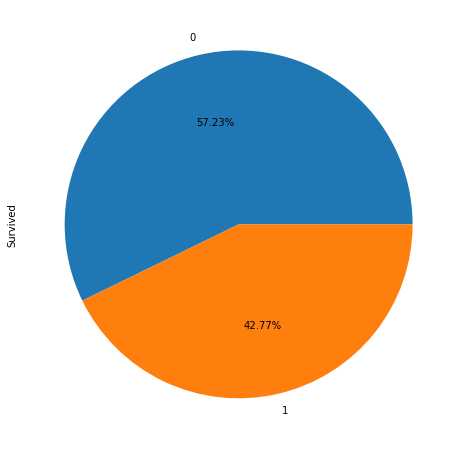

In [192]:
# посмотрим на нашу целевую переменную
df.groupby(['Survived'])['Survived'].count().plot(kind='pie',figsize=(12,8),autopct='%.2f%%')

Рассмотрим общую статистику

In [193]:
df.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Desk
count,100000.000000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,95377,100000.000000,100000,100000,100000.000000,100000
unique,NaN,NaN,92144,2,NaN,NaN,NaN,75331,NaN,26993,3,NaN,9
top,NaN,NaN,"Johnson, John",male,NaN,NaN,NaN,A/5,NaN,0,S,NaN,0
freq,NaN,NaN,31,56114,NaN,NaN,NaN,602,NaN,67866,72389,NaN,67866
mean,0.427740,2.106910,NaN,NaN,38.319790,0.397690,0.454560,NaN,43.911139,NaN,NaN,0.852250,NaN
std,0.494753,0.837727,NaN,NaN,18.056272,0.862566,0.950076,NaN,69.548710,NaN,NaN,1.412792,NaN
min,0.000000,1.000000,NaN,NaN,0.080000,0.000000,0.000000,NaN,0.680000,NaN,NaN,0.000000,NaN
25%,0.000000,1.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,10.040000,NaN,NaN,0.000000,NaN
50%,0.000000,2.000000,NaN,NaN,38.000000,0.000000,0.000000,NaN,24.450000,NaN,NaN,0.000000,NaN
75%,1.000000,3.000000,NaN,NaN,53.000000,1.000000,1.000000,NaN,33.500000,NaN,NaN,1.000000,NaN


In [194]:
# сгруппируем признаки вокруг целевой переменной survived
df.groupby(df['Survived'])[numerical].describe()

Pclass                                                   Age  \
            count      mean       std  min  25%  50%  75%  max    count   
Survived                                                                  
0         57226.0  2.316744  0.813416  1.0  2.0  3.0  3.0  3.0  57226.0   
1         42774.0  1.826179  0.785995  1.0  1.0  2.0  2.0  3.0  42774.0   

                                                               Family  \
               mean        std   min   25%   50%   75%   max    count   
Survived                                                                
0         36.669796  17.551421  0.08  24.0  36.0  51.0  83.0  57226.0   
1         40.527266  18.481654  0.08  27.0  43.0  55.0  87.0  42774.0   

                                                           Fare             \
              mean       std  min  25%  50%  75%   max    count       mean   
Survived                                                                     
0         0.838727  1.446169  0.0  0.0  0.0  1.0  17.0  57226.0  32.638467   
1         0.870342  1.366671  0.0  0.0  0.0  1.0  17.0  42774.0  58.992494   

                                                         
                std   min    25%    50%     75%     max  
Survived                                                 
0         54.439071  0.68   9.16  13.05  29.720  732.01  
1         83.343055  1.41  13.30  28.61  67.855  744.66

In [195]:
df.groupby(df['Survived'])[categorical].describe(include = 'all')

Sex                       Embarked                     Desk  \
          count unique     top   freq    count unique top   freq  count   
Survived                                                                  
0         57226      2    male  44566    57226      3   S  49522  57226   
1         42774      2  female  31226    42774      3   S  22867  42774   

                            
         unique top   freq  
Survived                    
0             9   0  44649  
1             9   0  23217

Визуализируем информацию по основным признакам

array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

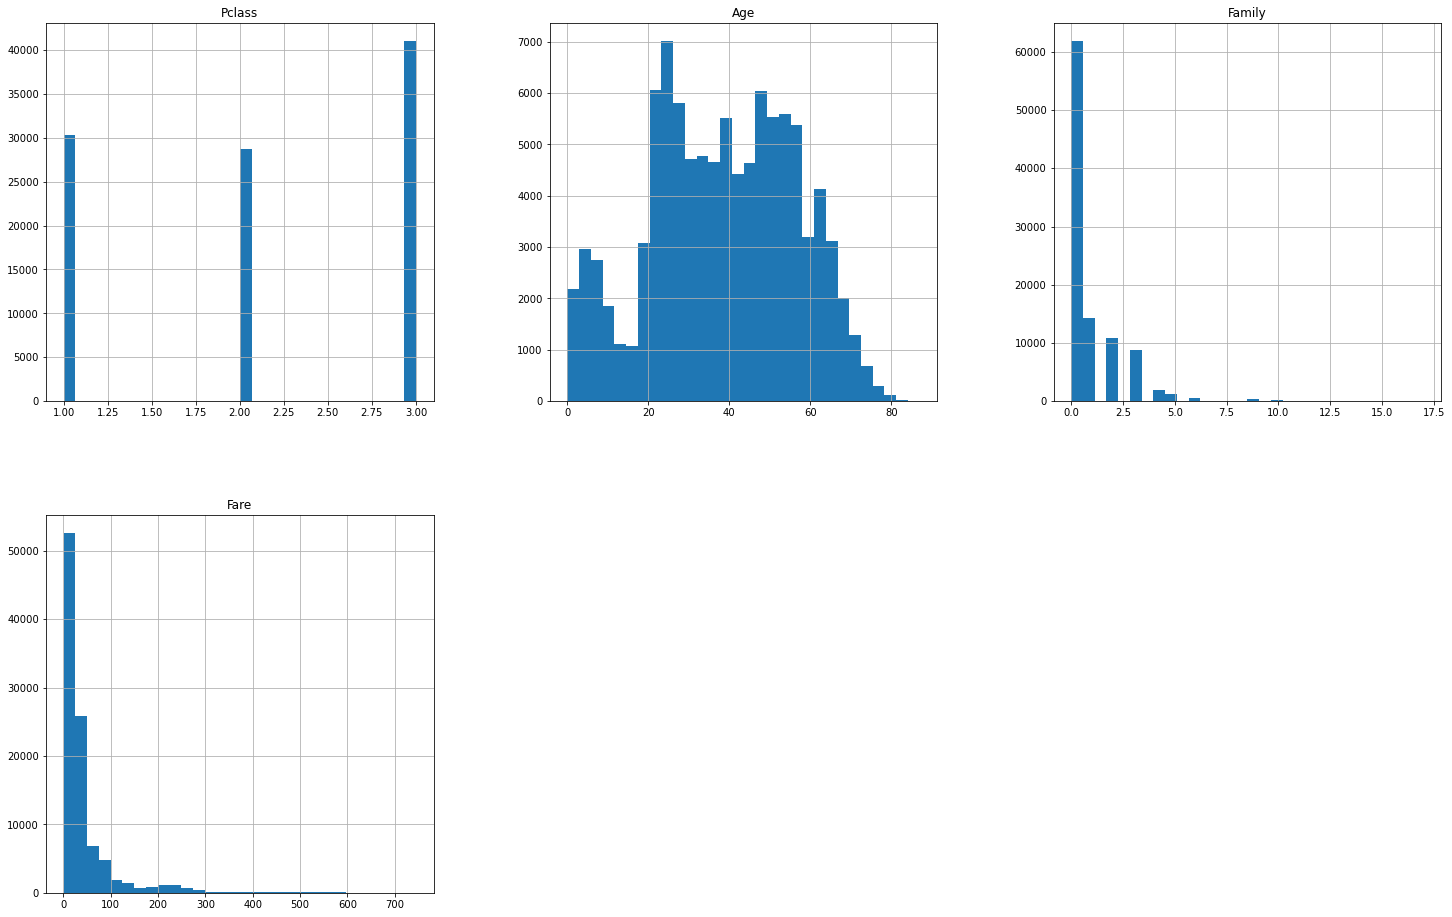

In [196]:
# 1. создаем гистограмму сразу для всех чисовых признаков
df[numerical].hist(bins=30, figsize=(25, 16), layout=(2, 3))

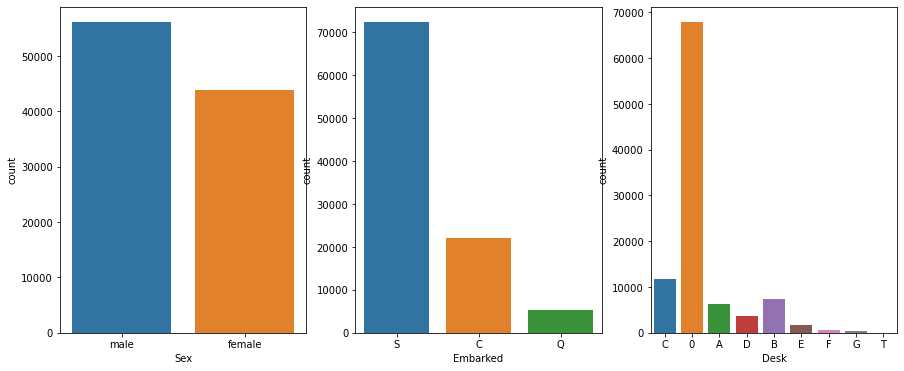

In [197]:
# для категориальных признаков
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x = df[variable], ax=subplot)

 3. первые выводы
 
 итак, несмотря на то, что большинство на борту составляли мужчины - большинство выживших женщины
 
 больше всего на борту было пассажиров третьего класса, однако 75% выживших относились к 1 или 2 классу
 
 большинство пассажиров имели билеты стоимостью до 50$, однако среди выживших средняя стоимость билета почти 60
 
 т.е. данные признаки очевидно влияют на шансы выжить
 

Попробуем найти взаимосвязь между нашими переменными и целевой

Исследуем поле Sex

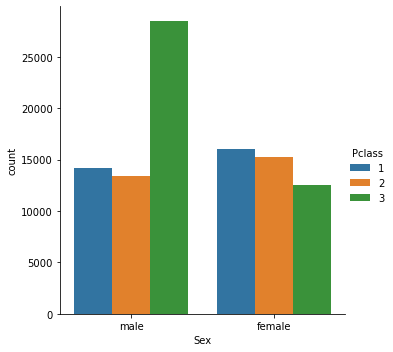

In [198]:
# 1. разделим пассажиров по полу и классу каюты
sns.catplot(x='Sex', data=df, kind="count", hue='Pclass')

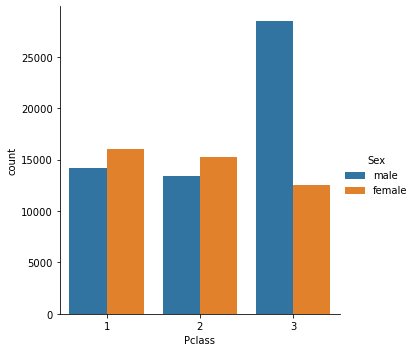

In [199]:
sns.catplot(x = 'Pclass', data=df, kind="count", hue='Sex')

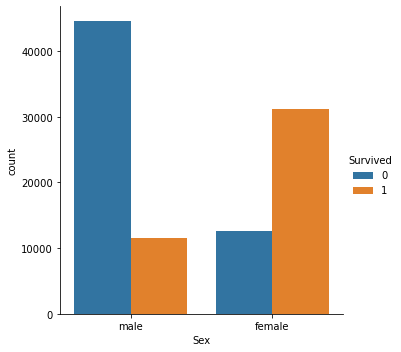

In [200]:
sns.catplot(x='Sex', data=df, kind="count", hue='Survived')
# мы видим, что в третьем классе было гораздо больше мужчин, чем женщин, что и может обуславливать то, что женщин среди выживших больше

Поле каюта (т.е. палуба)

как мы помним, мы ввели дополнительный столбец

<Figure size 864x576 with 0 Axes>

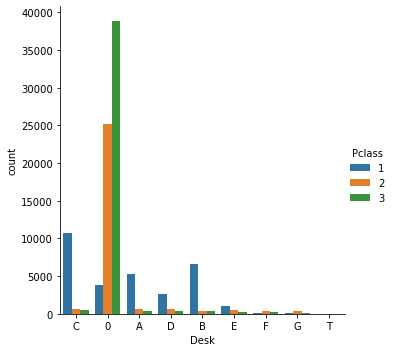

In [201]:
#проверим распределение кают по классам
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.catplot(x = 'Desk', data=df, kind='count', hue = 'Pclass')

In [202]:
# видим довольно странные артефакты, указывающие, что на всех палубах были как пассажиры 1-го, так и 3-го классов.
# что противоречит официальной информации о титанике и может быть объяснено тем что данные синтетические

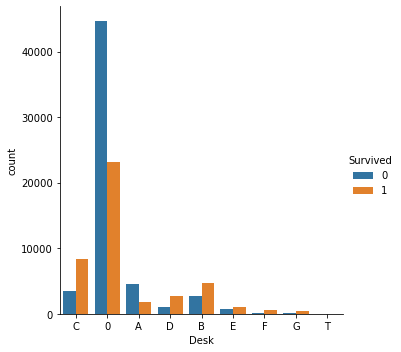

In [203]:
# и аналогично проверим по выживаемости
sns.catplot(x = 'Desk', data=df, kind='count', hue = 'Survived')

In [204]:
# наблюдаем подтверждение тому, что отсутствие каюты дает гораздо меньше шансов выжить.
# по палубам, за исключением палубы A выживших больше. т.е. наш столбец Desk представляет определенную ценность для исследования

Поле Family

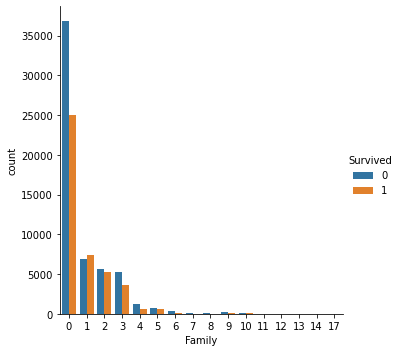

In [205]:
# 2. исследуем переменную Family
sns.catplot(x='Family', data=df, kind="count", hue='Survived')

In [206]:
#можно заметить, что среди путешествующих в одиночку выживших, заметно меньше, гораздо больше шансов на выживание имели
#пассажиры с небольшим количеством родственников - 1-2. это позволяет нам разделить пассажиров на категории
# 0 - без родственников
# 1 - 1-2 родственника
# 2 - 3-6 родственников
# 3 - все остальные
def set_value(row_number, assigned_value):
    return assigned_value[row_number] 

event_dictionary ={0 : 0, 1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3, 11 : 3, 12 : 3, 13 : 3, 14 : 3, 15 : 3, 16 : 3, 17 : 3} 
df['Cat_family'] = df['Family'].apply(set_value, args =(event_dictionary, ))
df.groupby('Cat_family')['Cat_family'].count()

Cat_family
0    61853
1    25001
2    12452
3      694
Name: Cat_family, dtype: int64

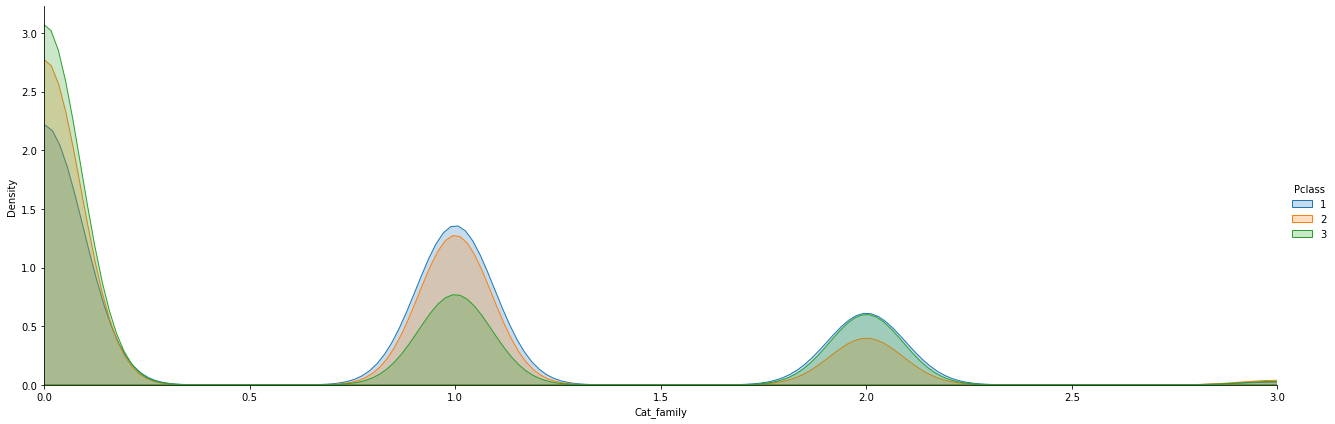

In [207]:
#посмотрим на распределение семей по классам
fig = sns.FacetGrid(df, hue='Pclass', aspect=3, height = 6)
fig.map(sns.kdeplot, 'Cat_family',shade=True)
many = df['Cat_family'].max()
fig.set(xlim= (0,many))
fig.add_legend()
# мы видим, что большинство одиноких пассажиров находились в третьем классе, в то время как пассажиры 1-2 классо путешествовали небольшой семьей

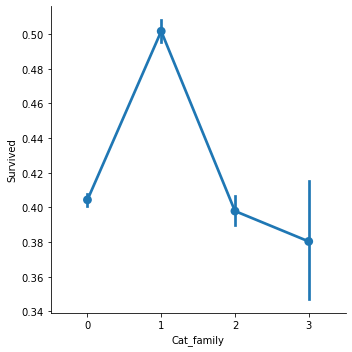

In [208]:
# и проверим как наличие семьи влияло на выживаемость
sns.catplot(x = 'Cat_family',y = 'Survived',data=df, kind = 'point')
# и видим, что наличие 1-2 родственников значительно повышает шансы на выживание

Признак Embarked

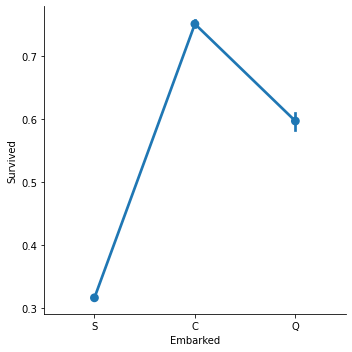

In [209]:
# 3. рассмотрим место посадки и проверим взаимосвязь с целевой переменной
sns.catplot(x = 'Embarked',y = 'Survived',data=df, kind = 'point')
# как видим наиболее высокие шансы у севших на Титаник в Cherbourg, и самые низкие - в Southampton

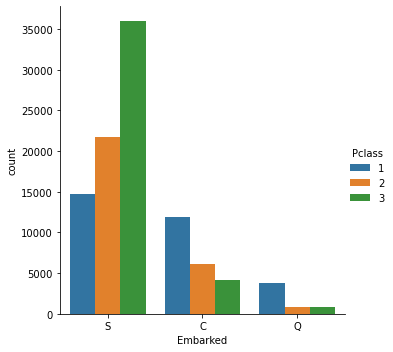

In [210]:
# попробуем отследить взаимосвязь места посадки с дургими переменными
sns.catplot(x='Embarked', data=df, kind="count", hue='Pclass')
# т.е. значительная часть пассажиров третьего класса, у которых шанс выжить был гораздо меньше поднялась на борт именно в Southampton

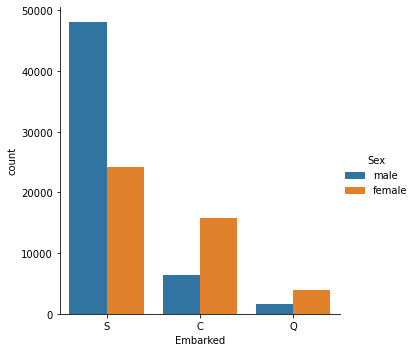

In [211]:
sns.catplot(x='Embarked', data=df, kind="count", hue='Sex')
# и опять же в Southampton на бот поднялось больше мужчин, у которых по статистике шанс выжить был меньше

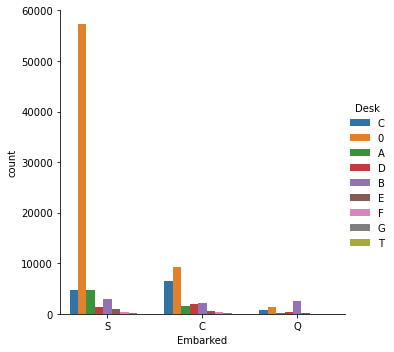

In [212]:
sns.catplot(x='Embarked', data=df, kind="count", hue='Desk')
# также по наличию каюты/палубе мы видим, что в Southampton на борт поднялась значительная часть пассажиров без каюты или
# или с каютой на палубе А
# соответственно мы можем сделать вывод, что место посадки на борт само по себе не имеет значения

Признаки Age и Fare

<AxesSubplot:xlabel='Age', ylabel='Count'>

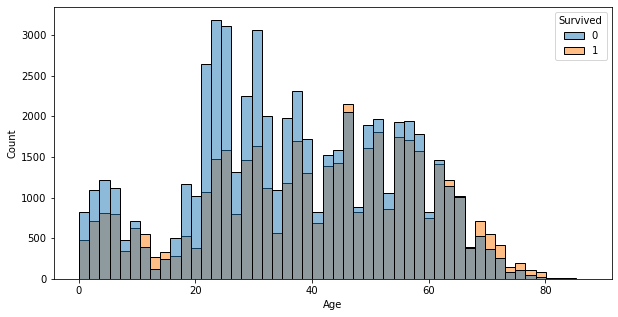

In [213]:
# 4. рассмотрим возраст 
# можно было бы предположить, что у более молодых больше шансов выжить.
# проверим правильность этой гипотезы
sns.histplot(data=df,x="Age",hue='Survived', bins=50)
# и видим как раз обратную ситуацию, среди людей от 20 до 40 выживших гораздо меньше, чем погибших

<AxesSubplot:xlabel='Sex', ylabel='Age'>

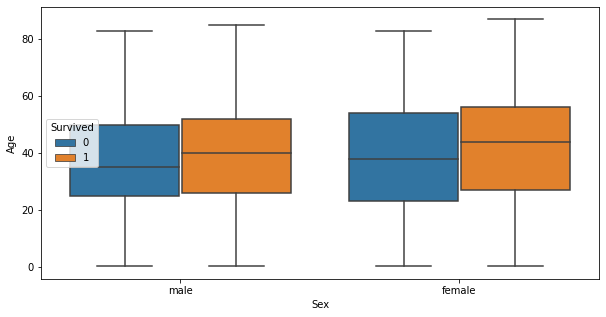

In [214]:
sns.boxplot(data = df, x='Sex', y='Age', hue = 'Survived')
# как видим, распределение по возрасту примерно одинаковое

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

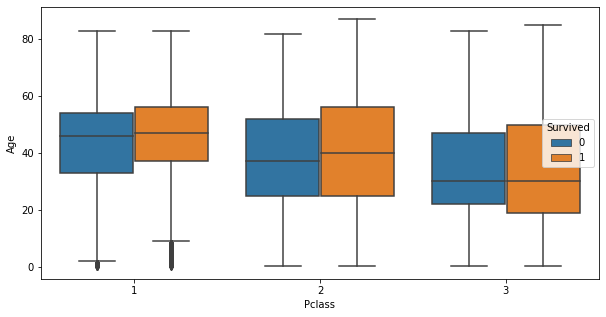

In [215]:
sns.boxplot(data = df, x='Pclass', y='Age', hue = 'Survived')
# слабо выраженная тенденция к тому, что в первом и втором классе выживали более старшие

<AxesSubplot:xlabel='Fare', ylabel='Count'>

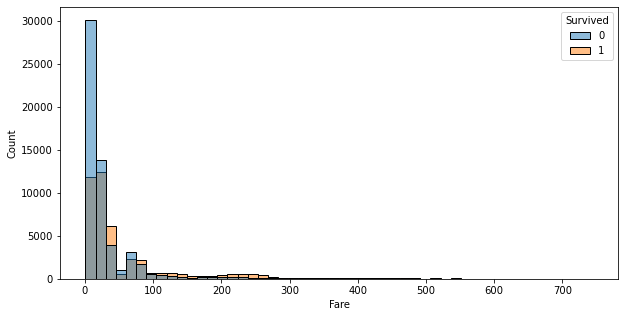

In [216]:
# 5. аналогично проверим стоимость билетов
sns.histplot(data=df,x="Fare",hue='Survived', bins=50)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

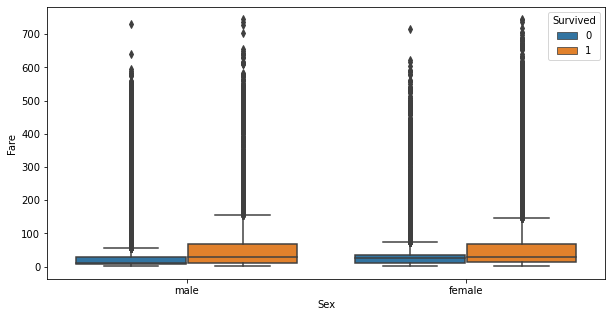

In [217]:
sns.boxplot(data = df, x='Sex', y='Fare', hue = 'Survived')
# по цене видим, что с более дорогими билетами шанс выжить больше
# присутвтуют выбросы

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

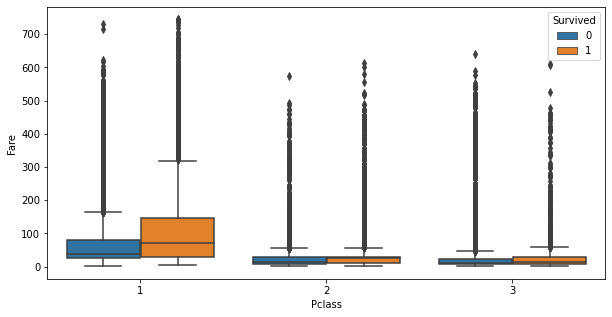

In [218]:
sns.boxplot(data = df, x='Pclass', y='Fare', hue = 'Survived')

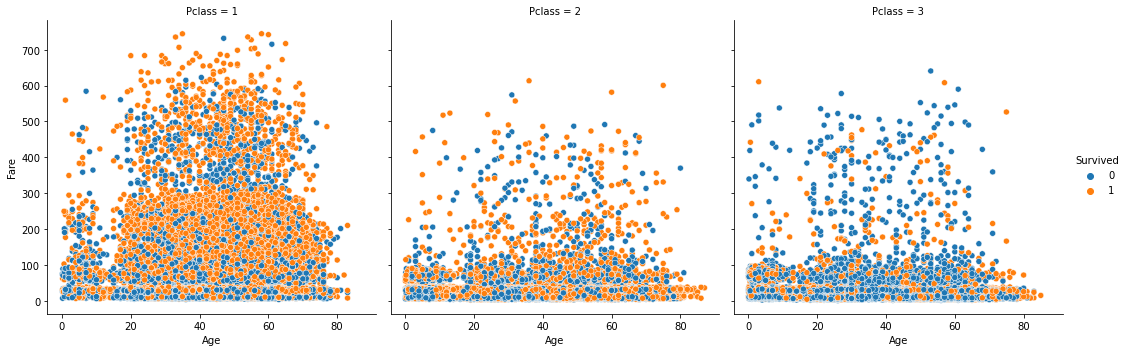

In [219]:
# проверим распределение стоимости билетов по возрастам и классам
sns.relplot(data=df,x="Age", y="Fare", col="Pclass",hue='Survived')

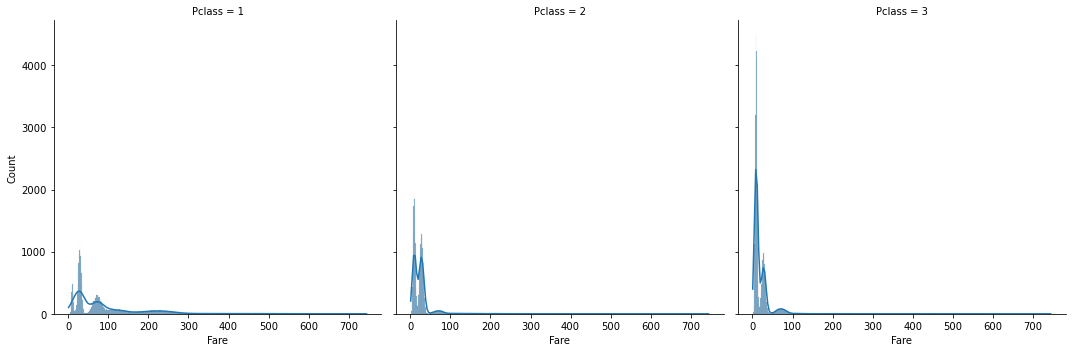

In [220]:
# очень любопытно, что в первом классе мы также наблюдаем большое количество билетов стоимостью до 100$
# можно было бы предположить, что меньше стоили детские билеты, однако судя по графикам, по возрастам данные билеты распределены достаточно равномерно
sns.displot(data=df, x="Fare", col="Pclass", kde=True)

In [221]:
df.groupby('Pclass').describe()
#при этом мы видим, что средняя стоимость билета 3-го класса в несколько раз ниже стоимости билета 1-го класса

Survived                                                   Age  \
          count      mean       std  min  25%  50%  75%  max    count   
Pclass                                                                  
1       30315.0  0.579779  0.493602  0.0  0.0  1.0  1.0  1.0  30315.0   
2       28679.0  0.525018  0.499382  0.0  0.0  1.0  1.0  1.0  28679.0   
3       41006.0  0.247305  0.431451  0.0  0.0  0.0  0.0  1.0  41006.0   

                                                              SibSp            \
             mean        std   min   25%   50%   75%   max    count      mean   
Pclass                                                                          
1       44.845088  14.476902  0.08  35.0  47.0  55.0  83.0  30315.0  0.466337   
2       38.610371  18.948942  0.08  25.0  38.0  54.0  87.0  28679.0  0.382161   
3       33.292526  18.226827  0.08  22.0  30.0  48.0  85.0  41006.0  0.357801   

                                             Parch                           \
             std  min  25%  50%  75%  max    count      mean       std  min   
Pclass                                                                        
1       0.778886  0.0  0.0  0.0  1.0  8.0  30315.0  0.517170  1.001381  0.0   
2       0.930673  0.0  0.0  0.0  0.0  8.0  28679.0  0.438335  0.904512  0.0   
3       0.868873  0.0  0.0  0.0  0.0  8.0  41006.0  0.419622  0.939929  0.0   

                               Fare                                            \
        25%  50%  75%  max    count       mean        std   min    25%    50%   
Pclass                                                                          
1       0.0  0.0  1.0  9.0  30315.0  92.614752  99.761552  3.38  27.90  63.58   
2       0.0  0.0  1.0  9.0  28679.0  25.751557  34.823776  1.72  10.17  22.72   
3       0.0  0.0  0.0  9.0  41006.0  20.605978  32.602884  0.68   8.55  10.96   

                           Family                                          \
             75%     max    count      mean       std  min  25%  50%  75%   
Pclass                                                                      
1       116.6850  744.66  30315.0  0.983507  1.387673  0.0  0.0  0.0  2.0   
2        29.2000  613.43  28679.0  0.820496  1.413769  0.0  0.0  0.0  1.0   
3        25.7575  640.79  41006.0  0.777423  1.423765  0.0  0.0  0.0  1.0   

             Cat_family                                               
         max      count      mean       std  min  25%  50%  75%  max  
Pclass                                                                
1       12.0    30315.0  0.630018  0.746532  0.0  0.0  0.0  1.0  3.0  
2       17.0    28679.0  0.488267  0.692829  0.0  0.0  0.0  1.0  3.0  
3       17.0    41006.0  0.460542  0.746126  0.0  0.0  0.0  1.0  3.0

In [222]:
# удалим из таблицы признаки, которые нам на текущий момент не очень нужны
# возможно для дальнейшего анализа удобнее будет использовать категории семьи, чем количество членов семьи
df_train = df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Cat_family'], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Family,Desk
PassengerId,,,,,,,
0,1,1,male,47.00,27.14,2,C
1,0,3,male,30.00,13.35,0,0
2,0,3,male,0.33,71.29,3,0
3,0,3,male,19.00,13.04,0,0
4,1,3,male,25.00,7.76,0,0


In [223]:
#сделаем категориальные признаки числовыми
event_dictionary1 ={'male' : 0, 'female' : 1} 
df_train['Sex'] =df_train['Sex'].apply(set_value, args =(event_dictionary1, ))
event_dictionary2 ={0 : 0, '0':0, 'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'T' : 7} 
df_train['Desk'] =df_train['Desk'].apply(set_value, args =(event_dictionary2, ))
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Family,Desk
PassengerId,,,,,,,
0,1,1,0,47.00,27.14,2,3
1,0,3,0,30.00,13.35,0,0
2,0,3,0,0.33,71.29,3,0
3,0,3,0,19.00,13.04,0,0
4,1,3,0,25.00,7.76,0,0


<AxesSubplot:>

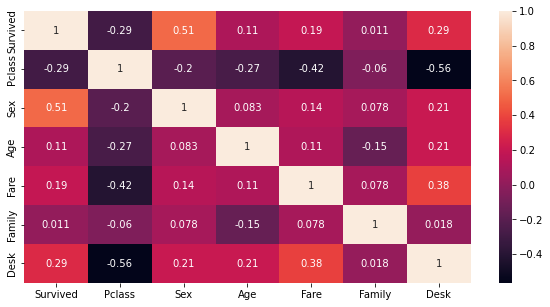

In [224]:
sns.heatmap(df_train.corr(),annot = True)
# в итоге мы получили таблицу с признаками, которые лучше взаимодействуют с целевой переменной 

# Summary

In [225]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Desk,Cat_family
PassengerId,,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,47.00,2,0,209245,27.14,C12239,S,2,C,1
1,0,3,"Bryan, Drew",male,30.00,0,0,27323,13.35,0,S,0,0,0
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,0,S,3,0,2
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,0,S,0,0,0
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,0,S,0,0,0


В исходной таблице столбцы как Name, Ticket, PassengerId не несут полезной информации в контексте целевой переменной, поэтому они были ислкючены

Поля SibSp и Parch описывают схожие характеристики, поэтому их логично объединить в общее поле Family и уменьшить размерность, было создано новое поле Cat_family

Из поля Cabin важна информация о наличии каюты, и её месторасположении, был создан новый признак Desk


Итак, наибольшие шансы выжить имели
- женщины
- пассажиры первого класса
- с каютой, расположенной на палубах B-G (как ни странно, но в данном датасете на палубах E-G присутствуют каюты первого класса, а на палубах A-D каюты третьего класса,  в отличие от реального Титаника)
- путешествующие совместно с 1-2 родственниками
